In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("dataset_5secondWindow%5B1%5D.csv")

In [2]:
dataset.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 14 columns):
time                                 5893 non-null float64
android.sensor.accelerometer#mean    5893 non-null float64
android.sensor.accelerometer#min     5893 non-null float64
android.sensor.accelerometer#max     5893 non-null float64
android.sensor.accelerometer#std     5893 non-null float64
android.sensor.gyroscope#mean        5893 non-null float64
android.sensor.gyroscope#min         5893 non-null float64
android.sensor.gyroscope#max         5893 non-null float64
android.sensor.gyroscope#std         5893 non-null float64
sound#mean                           5893 non-null float64
sound#min                            5893 non-null float64
sound#max                            5893 non-null float64
sound#std                            5893 non-null float64
target                               5893 non-null object
dtypes: float64(13), object(1)
memory usage: 644.7+ KB


In [4]:
to_drop = [c for c in dataset.columns if '#std' in c]
dataset.drop(to_drop, axis = 1, inplace = True)
dataset.columns = dataset.columns.str.replace('android.sensor.','').str.replace("#","_")
dataset.head()

,time,accelerometer_mean,accelerometer_min,accelerometer_max,gyroscope_mean,gyroscope_min,gyroscope_max,sound_mean,sound_min,sound_max,target
0,78.0,9.811476,9.758895,9.849411,0.001651,0.000000,0.003533,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,0.036326,0.011669,0.059388,89.200210,89.065143,89.335277,Car
2,150.0,9.827178,9.804817,9.849262,0.001525,0.000000,0.002609,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.036440,0.020463,0.052512,87.470377,87.470377,87.470377,Car
4,77.0,9.993466,8.965621,10.891645,0.183202,0.020667,0.380875,89.770732,89.770732,89.770732,Car


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize = (10, 15))

plt.subplot(4, 1, 1)
sns.distplot(dataset.iloc[:,0])
plt.xlabel('Time')

plt.subplot(4, 1, 2)
for i in range (1, 4):
    sns.distplot(dataset.iloc[:,i])
plt.legend(dataset.iloc[:,1:4].columns)
plt.xlabel("Acclerometer")

plt.subplot(4, 1, 3)
for i in range(4, 7):
    sns.distplot(dataset.iloc[:,i])
plt.legend(dataset.iloc[:,4:7].columns)
plt.xlabel("Gyroscope")

plt.subplot(4, 1, 4)
for i in range(7,10):
    sns.distplot(dataset.iloc[:, i])
plt.legend(dataset.iloc[:,7:10].columns)
plt.xlabel("Sound")

Text(0.5, 0, 'Sound')

In [6]:
dataset.drop(['sound_min','sound_max'], axis =1 , inplace = True)


In [7]:
dataset.head()

,time,accelerometer_mean,accelerometer_min,accelerometer_max,gyroscope_mean,gyroscope_min,gyroscope_max,sound_mean,target
0,78.0,9.811476,9.758895,9.849411,0.001651,0.000000,0.003533,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,0.036326,0.011669,0.059388,89.200210,Car
2,150.0,9.827178,9.804817,9.849262,0.001525,0.000000,0.002609,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.036440,0.020463,0.052512,87.470377,Car
4,77.0,9.993466,8.965621,10.891645,0.183202,0.020667,0.380875,89.770732,Car


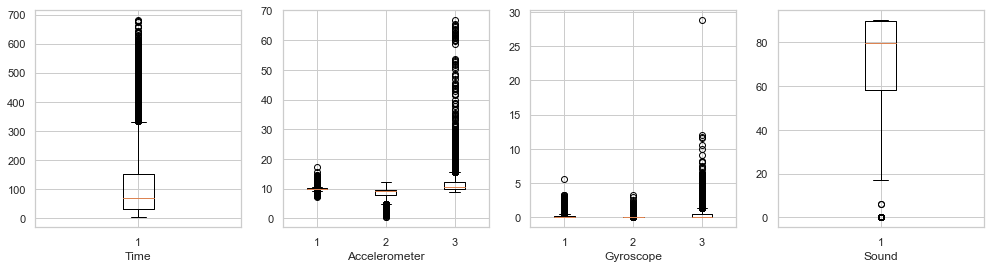

In [8]:
plt.figure(figsize=(17,4))

plt.subplot(141)
plt.boxplot(dataset.iloc[:,0])
plt.xlabel('Time')

plt.subplot(142)
plt.boxplot([dataset.iloc[:,1],dataset.iloc[:,2],dataset.iloc[:,3]])
plt.xlabel('Accelerometer')

plt.subplot(143)
plt.boxplot([dataset.iloc[:,4],dataset.iloc[:,5],dataset.iloc[:,6]])
plt.xlabel('Gyroscope')

plt.subplot(144)
plt.boxplot(dataset.iloc[:,7]);
plt.xlabel('Sound')

plt.show()

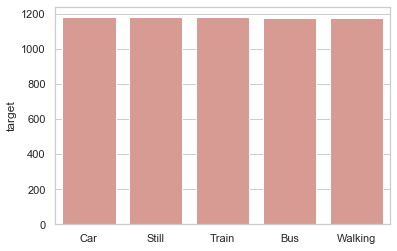

In [9]:
sns.barplot(x=dataset.target.value_counts().index,y=dataset.target.value_counts(),color="salmon",saturation=.5);

In [10]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['target'],axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
clf = GaussianNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
score = accuracy_score(predicted, y_test)
print(score)

0.5131467345207803


In [13]:
from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
score = accuracy_score(predict, y_test)
print(score)

0.6191687871077184


In [15]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
score = accuracy_score(predict, y_test)
print(score)

C:\Users\Gurpreet\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.5911789652247668


In [12]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
score = accuracy_score(predict, y_test)
print(score)

0.7735368956743003


In [56]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 15)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
score = accuracy_score(predict, y_test)
print(score)

0.7752332485156913


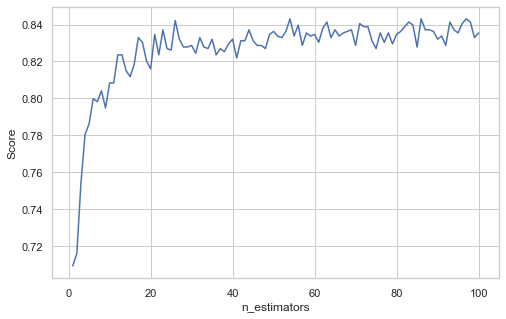

In [27]:
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(8,5))
K = range(1,101)
scores = []
for k in K:
    clf = RandomForestClassifier(n_estimators = k)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

sns.lineplot(K, scores)
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.show()

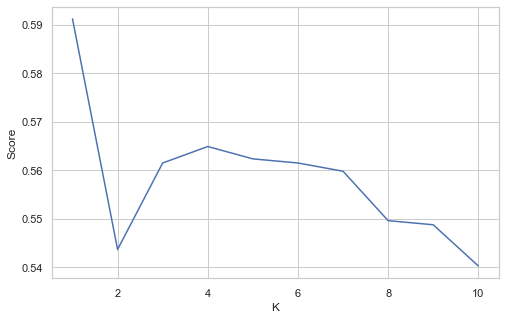

In [55]:
from sklearn.neighbors import KNeighborsClassifier
plt.figure(figsize=(8,5))
K = range(1, 11)
scores = []
for k in K:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    scores.append(neigh.score(X_test, y_test))
    
sns.lineplot(K, scores)
plt.ylabel("Score")
plt.xlabel("K")
plt.show()

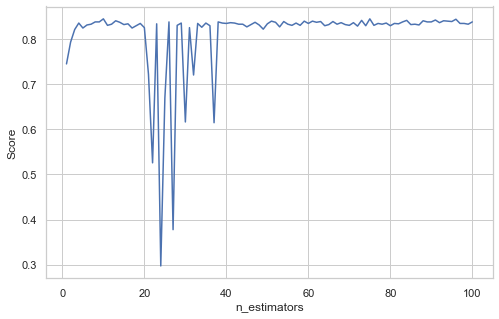

In [58]:
from sklearn.ensemble import AdaBoostClassifier
plt.figure(figsize=(8,5))
K = range(1,101)
scores = []
for k in K:
    clf = AdaBoostClassifier(base_estimator = RandomForestClassifier(n_estimators = k), n_estimators = 100)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

sns.lineplot(K, scores)
plt.ylabel("Score")
plt.xlabel("n_estimators")
plt.show()